In [2]:
# source: https://www.kaggle.com/moidhasan/cnn-introduction-tensorflow-2-0-ipynb
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
get_ipython().magic('matplotlib inline')
np.random.seed(1)
#import cv2
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
##printing version of tensorflow
print(tf.__version__)

2.3.1


In [3]:
train_path="mnist_train.csv"
test_path="mnist_test.csv"
train = pd.read_csv(train_path)
print(train.shape)
print(train.head())
test= pd.read_csv(test_path)
print(test.shape)
print(test.head())

(60000, 785)
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
(10000, 785)
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ..

In [20]:
type(train)

pandas.core.frame.DataFrame

In [19]:
y_orig1

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [4]:
# put labels into y_train variable
y_orig1 = train["label"]
y_orig1_test = test["label"]
# Drop 'label' column
X_orig2 = train.drop(labels = ["label"],axis = 1,inplace=False)
X_orig2_test = test.drop(labels = ["label"],axis = 1,inplace=False)

/home/rtes/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/rtes/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: label, dtype: int64

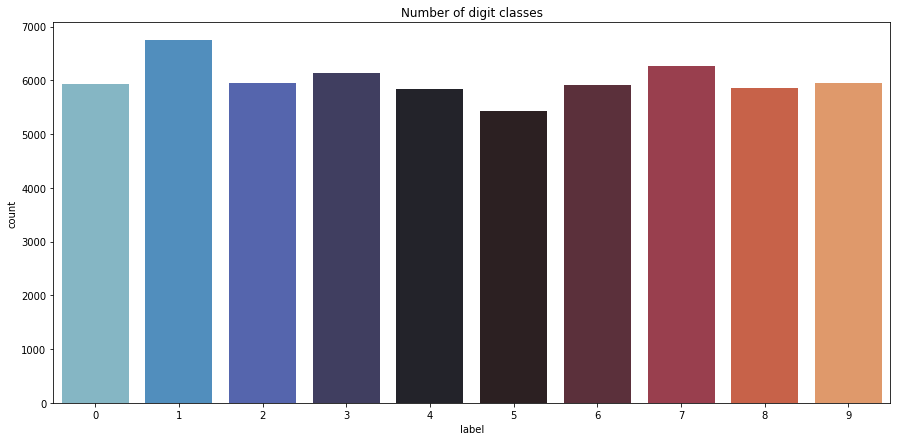

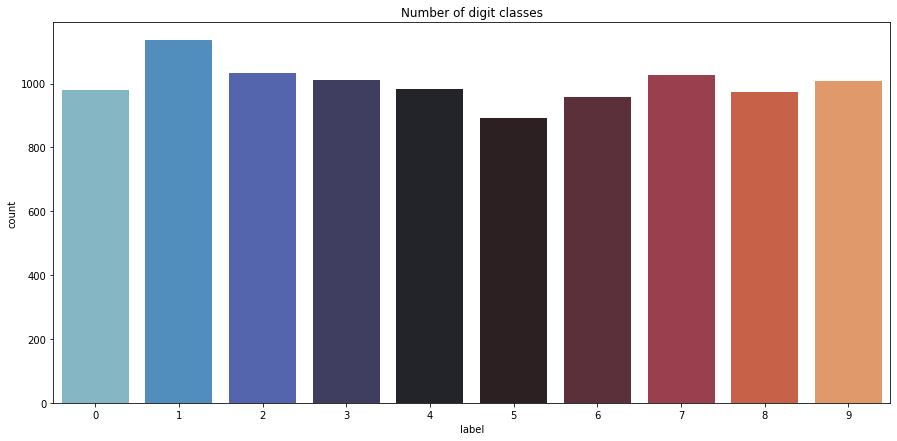

In [5]:
# visualize number of digits classes
import seaborn as sns
plt.figure(figsize=(15,7))
g = sns.countplot(y_orig1, palette="icefire")
plt.title("Number of digit classes")
y_orig1.value_counts()

# visualize number of digits classes
import seaborn as sns
plt.figure(figsize=(15,7))
g = sns.countplot(y_orig1_test, palette="icefire")
plt.title("Number of digit classes")
y_orig1_test.value_counts()

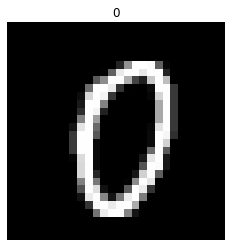

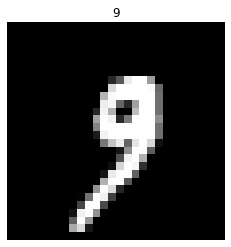

In [6]:
# Example of a picture
index = 1000
img = X_orig2.iloc[index].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y_orig1[index])
plt.axis("off")
plt.show()

# Example of a picture
index = 1000
img = X_orig2_test.iloc[index].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y_orig1_test[index])
plt.axis("off")
plt.show()

In [7]:
# Normalize the data
X_orig1 = X_orig2 / 255.0
X_orig1_test = X_orig2_test / 255.0
print("x_orig1 shape: ",X_orig1.shape)
print("x_orig1_test shape: ",X_orig1_test.shape)

# Reshape
X_orig = X_orig1.values.reshape(-1,28,28,1)
X_orig_test = X_orig1_test.values.reshape(-1,28,28,1)
print("x_orig shape: ",X_orig.shape)
print("x_orig_test shape: ",X_orig_test.shape)

# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
print("old y_orig1 shape: ", y_orig1.shape)
y_orig = to_categorical(y_orig1, num_classes = 10)
print("y_orig shape: ",y_orig.shape)

print("old y_orig1_test shape: ", y_orig1_test.shape)
y_orig_test = to_categorical(y_orig1_test, num_classes = 10)
print("y_orig_test shape: ",y_orig_test.shape)

x_orig1 shape:  (60000, 784)
x_orig1_test shape:  (10000, 784)
x_orig shape:  (60000, 28, 28, 1)
x_orig_test shape:  (10000, 28, 28, 1)
old y_orig1 shape:  (60000,)
y_orig shape:  (60000, 10)
old y_orig1_test shape:  (10000,)
y_orig_test shape:  (10000, 10)


Using TensorFlow backend.


In [8]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_orig, y_orig, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_val shape",Y_val.shape)

x_train shape (48000, 28, 28, 1)
x_val shape (12000, 28, 28, 1)
y_train shape (48000, 10)
y_val shape (12000, 10)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


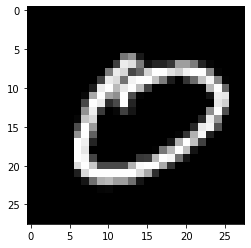

In [9]:
# Some examples
index=1
print(Y_train[index])
plt.imshow(X_train[index][:,:,0],cmap='gray')
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [13]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [14]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [15]:
epochs = 10  # for better result increase the epochs
batch_size = 200

In [21]:
type(X_train)

numpy.ndarray

In [23]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [16]:
%%time
history = model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=epochs
                    ,shuffle=True,steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
240/240 [==============================] - 14s 57ms/step - loss: 0.3932 - accuracy: 0.8932 - val_loss: 0.1211 - val_accuracy: 0.9636
Epoch 2/10
240/240 [==============================] - 13s 55ms/step - loss: 0.0930 - accuracy: 0.9721 - val_loss: 0.0774 - val_accuracy: 0.9768
Epoch 3/10
240/240 [==============================] - 14s 56ms/step - loss: 0.0640 - accuracy: 0.9806 - val_loss: 0.0669 - val_accuracy: 0.9794
Epoch 4/10
240/240 [==============================] - 14s 58ms/step - loss: 0.0503 - accuracy: 0.9843 - val_loss: 0.0492 - val_accuracy: 0.9861
Epoch 5/10
240/240 [==============================] - 14s 58ms/step - loss: 0.0405 - accuracy: 0.9877 - val_loss: 0.0471 - val_accuracy: 0.9868
Epoch 6/10
240/240 [==============================] - 14s 58ms/step - loss: 0.0338 - accuracy: 0.9899 - val_loss: 0.0425 - val_accuracy: 0.9874
Epoch 7/10
240/240 [==============================] - 14s 58ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0502 - val_accuracy:

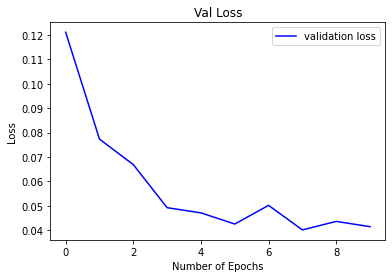

In [17]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Val Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()